# LSA ( = LSI )

https://nlp.stanford.edu/IR-book/newslides.html

위 링크의 18번 ppt.2의 내용이다. 


SVD를 이용해서 차원을 축소한다. 

MxN을 MxK / K / KxN 으로 분해해서 표현한다. 

K의 값을 아무리 바꿔도 MxN의 형태는 유지가 된다. 그래서 이를 이용해서 K를 Topic으로 보고 K를 조정해가며 설정할 수 있다. 

decompose하고 다시 원형으로 바꾸면서 similarity 보다 더 나은 measure을 찾아낸다. 

M : 단어 / K : latent semantic / N : 문서

U : row는 단어

$V^T$ : 각각의 문서

$\Sigma$ : 어떤 컨셉이 얼마나 중요한지

이러한 과정을 Latent Semantic Indexing(LSI,LSA)라고 한다. 

Noise와 유사해보이지만 유사하지 않은 정보를 버리면서 더 좋은 결과를 낼 수 있게 된다. 




In [1]:
import numpy as np

In [6]:
X = np.array([[1,1,0,0,0],
                      [0,1,0,0,0],
                      [0,0,1,0,0],
                      [0,0,0,1,0],
                      [0,0,0,0,1]])

In [14]:
# 데이터, shape, 차원 
# Document Term matrix
# Row: Documents(5)
# Column: Term(5)
X , X.shape, X.ndim

(array([[1, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]]), (5, 5), 2)

In [16]:
# 단어에 대해서 단어 레벨을 곱해주는 것 
# 내적은 코사인 시밀러티의 기반이됨
X[0],X.T[0]

(array([1, 1, 0, 0, 0]), array([1, 0, 0, 0, 0]))

In [18]:
# TDM
# 행이 단어
X.T

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [33]:
# 0~5번째 0~5번째 문서의 내적으로 만들어진 5X5행렬이 나오게 됨 
# 대각을 기준으로 대칭적임 
# 대각은 1이 됨 ( cosine similarity 이기 때문에 : 그냥 같은 문서라 똑같아서 1 )
X.dot(X)

array([[1, 2, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [27]:
X.T[0].reshape(1,5).shape, X[:,[0]].shape

((1, 5), (5, 1))

In [28]:
X.T[0] # 0번째 문서 

array([1, 0, 0, 0, 0])

In [30]:
X[:,0] # 0번째 문서 
X[:,1] # 1번째 문서

array([1, 1, 0, 0, 0])

In [35]:
X.T[0].dot(X[:,1] )

1

In [39]:
# 자기 자신을 다 곱한것. 
# 0행 x 0행

# cosine
# cos(X,Y) = innerproduct(X,Y) / len(X)len(Y)
_X = X.dot(X.T)

In [41]:
X

array([[1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [42]:
# 거리
np.linalg.norm(X[0])

# = sqrt(1^2+1^2) = sqrt(2)의 값

1.4142135623730951

In [43]:
np.linalg.norm(X, axis=1) # 행별로 자기 자신의 곱 
# 각각 문서에 대한 길이 
# 위의 len(x)가 된 것. 

array([1.41421356, 1.        , 1.        , 1.        , 1.        ])

In [44]:
np.linalg.norm(X.T, axis=0)  # transpose하고 열단위로 계산 , len(y)
# 둘의 곱셈을 위해 (1,5)로 reshape

array([1.41421356, 1.        , 1.        , 1.        , 1.        ])

In [46]:
np.linalg.norm(X, axis=1).reshape(5,1) * np.linalg.norm(X.T, axis=0).reshape(1,5)

array([[2.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356],
       [1.41421356, 1.        , 1.        , 1.        , 1.        ],
       [1.41421356, 1.        , 1.        , 1.        , 1.        ],
       [1.41421356, 1.        , 1.        , 1.        , 1.        ],
       [1.41421356, 1.        , 1.        , 1.        , 1.        ]])

In [48]:
_X / (np.linalg.norm(X, axis=1).reshape(5,1) * np.linalg.norm(X.T, axis=0).reshape(1,5))
# 1번2번이 그나마 연관이 있는 것. 
# 나머지는 그냥 자기자신과 연관

array([[1.        , 0.70710678, 0.        , 0.        , 0.        ],
       [0.70710678, 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [49]:
X

array([[1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [51]:
np.linalg.svd(_X)

(array([[-0.85065081,  0.        ,  0.        ,  0.        , -0.52573111],
        [-0.52573111,  0.        ,  0.        ,  0.        ,  0.85065081],
        [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ]]),
 array([2.61803399, 1.        , 1.        , 1.        , 0.38196601]),
 array([[-0.85065081, -0.52573111, -0.        , -0.        , -0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
        [-0.52573111,  0.85065081,  0.        ,  0.        ,  0.        ]]))

# 피피티 데이터

In [101]:
C = np.array([[1,0,1,0,0,0],
             [0,1,0,0,0,0],
              [1,1,0,0,0,0],
              [1,0,0,1,1,0],
              [0,0,0,1,0,1]
             ])

In [102]:
C.shape

(5, 6)

In [103]:
# False로 해야 차원을 맞춤 
U,sigma,Vt = np.linalg.svd(C,full_matrices=False)

In [104]:
U.shape,sigma.shape,Vt.shape

((5, 5), (5,), (5, 6))

In [105]:
np.round(Vt)

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [-0., -1., -0.,  1.,  0.,  0.],
       [-0.,  1., -0.,  0., -0.,  0.],
       [-0.,  0.,  1.,  0., -1.,  1.],
       [ 1., -0., -1., -0., -0.,  0.]])

In [106]:
# K*K 형태로 만들어줘야함 
sigma

array([2.16250096, 1.59438237, 1.27529025, 1.        , 0.39391525])

In [107]:
_sigma = np.diag(sigma)
_sigma

array([[2.16250096, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.59438237, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.27529025, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.39391525]])

In [108]:
_C = U.dot(_sigma).dot(Vt)

In [109]:
# 원본과 같다.
C == np.round(_C)

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [110]:
np.round(U.dot(_sigma))
# 열에서 1들로 묶어서 cluster에서 중요한지를 표현함 

array([[ 1., -0., -1.,  1., -0.],
       [ 0., -1.,  1.,  0., -0.],
       [ 1., -1.,  0.,  0.,  0.],
       [ 2.,  1., -0., -1., -0.],
       [ 1.,  1.,  1.,  1.,  0.]])

In [111]:
np.round(U)

array([[ 0., -0., -1.,  1., -0.],
       [ 0., -0.,  1.,  0., -1.],
       [ 0., -1.,  0.,  0.,  1.],
       [ 1.,  0., -0., -1., -0.],
       [ 0.,  1.,  0.,  1.,  0.]])

In [112]:
V = ["ship","boat","ocean","wood","tree"]

In [113]:
import pandas as pd

In [114]:
pd.DataFrame(U.dot(_sigma), index=V)

,0,1,2,3,4
ship,0.952252,-0.472215,-0.726275,5.773503e-01,-0.097062
boat,0.279712,-0.528459,0.748623,1.110223e-16,-0.286454
ocean,1.028335,-0.814913,0.468911,1.110223e-16,0.242005
wood,1.520282,0.558946,-0.197550,-5.773503e-01,-0.062943
tree,0.568030,1.031162,0.528725,5.773503e-01,0.034119


In [115]:
sigma[:2] # K = min(m,n)  /  클러스터의 수, 잠재의미의 수

array([2.16250096, 1.59438237])

In [116]:
_sigma = np.diag(sigma[:2])
_sigma

array([[2.16250096, 0.        ],
       [0.        , 1.59438237]])

In [117]:
# shape 맞추려고 자름 
U[:,:2].dot(_sigma)

array([[ 0.95225185, -0.47221518],
       [ 0.2797116 , -0.52845914],
       [ 1.02833465, -0.81491313],
       [ 1.52028211,  0.55894647],
       [ 0.56803026,  1.03116165]])

In [118]:
Vt[:2,:].shape

(2, 6)

In [127]:
# 2차원으로 줄이고 복구한 것 
# 원본 정보를 아주 조금 손실함 
# 즉 차원을 줄여도 큰 영향이 없다는 것을 말한다. 
pd.DataFrame(U[:,:2].dot(_sigma.dot(Vt[:2,:])), index=V)

,0,1,2,3,4,5
ship,0.848146,0.515902,0.281625,0.129860,0.205743,-0.075882
boat,0.360778,0.357508,0.155125,-0.205653,-0.025264,-0.180389
ocean,1.003270,0.718285,0.360778,-0.050529,0.155125,-0.205653
wood,0.978006,0.129860,0.205743,1.028534,0.617139,0.411396
tree,0.129860,-0.386042,-0.075882,0.898674,0.411396,0.487278


In [128]:
pd.DataFrame(U.dot(np.diag(sigma)).dot(Vt),index=V)

,0,1,2,3,4,5
ship,1.000000e+00,-1.416560e-16,1.000000e+00,-9.262189e-17,-1.063636e-16,-7.348257e-17
boat,-9.202245e-17,1.000000e+00,-1.389379e-16,-4.073781e-17,2.709099e-16,-2.328651e-16
ocean,1.000000e+00,1.000000e+00,-6.218204e-16,2.517679e-16,-1.388439e-16,7.652643e-17
wood,1.000000e+00,2.759403e-16,-1.077270e-15,1.000000e+00,1.000000e+00,8.881328e-17
tree,-6.446619e-16,1.641829e-16,-3.923142e-16,1.000000e+00,2.088368e-18,1.000000e+00


In [129]:
# 위의 세 개 다 같아야함 
pd.DataFrame(C,index=V)

,0,1,2,3,4,5
ship,1,0,1,0,0,0
boat,0,1,0,0,0,0
ocean,1,1,0,0,0,0
wood,1,0,0,1,1,0
tree,0,0,0,1,0,1


U * sigma는 어떤 단어가 latent semantic에서 중요한지 알 수 있고,

sigma * Vt는 어떤 문서가 latent semantic에서 중요한지 알 수 있다.

In [130]:
U, sigma, Vt

(array([[ 4.40347480e-01, -2.96174360e-01, -5.69497581e-01,
          5.77350269e-01, -2.46402144e-01],
        [ 1.29346349e-01, -3.31450692e-01,  5.87021697e-01,
          1.11022302e-16, -7.27197008e-01],
        [ 4.75530263e-01, -5.11115242e-01,  3.67689978e-01,
          1.11022302e-16,  6.14358412e-01],
        [ 7.03020318e-01,  3.50572409e-01, -1.54905878e-01,
         -5.77350269e-01, -1.59788154e-01],
        [ 2.62672838e-01,  6.46746769e-01,  4.14591704e-01,
          5.77350269e-01,  8.66139898e-02]]),
 array([2.16250096, 1.59438237, 1.27529025, 1.        , 0.39391525]),
 array([[ 7.48623048e-01,  2.79711603e-01,  2.03628802e-01,
          4.46563110e-01,  3.25095956e-01,  1.21467154e-01],
        [-2.86453991e-01, -5.28459139e-01, -1.85761186e-01,
          6.25520701e-01,  2.19879758e-01,  4.05640944e-01],
        [-2.79711603e-01,  7.48623048e-01, -4.46563110e-01,
          2.03628802e-01, -1.21467154e-01,  3.25095956e-01],
        [-4.99600361e-16,  2.22044605e-16,  5

In [134]:
U.shape, np.diag(sigma).shape

((5, 5), (5, 5))

In [135]:
# latent semantic 차원에서의 단어의 중요도
_U = U.dot(np.diag(sigma))

In [138]:
np.round(_U)

array([[ 1., -0., -1.,  1., -0.],
       [ 0., -1.,  1.,  0., -0.],
       [ 1., -1.,  0.,  0.,  0.],
       [ 2.,  1., -0., -1., -0.],
       [ 1.,  1.,  1.,  1.,  0.]])

In [141]:
# Cosine similarity
pd.DataFrame(_U.dot(_U.T) / (np.linalg.norm(_U, axis=1).reshape(5,1) * np.linalg.norm(_U.T, axis=0).reshape(1,5)),index=V,columns=V)

,ship,boat,ocean,wood,tree
ship,1.000000e+00,-4.264405e-17,5.000000e-01,4.082483e-01,-4.565534e-16
boat,-4.264405e-17,1.000000e+00,7.071068e-01,-1.451691e-16,-4.124721e-16
ocean,5.000000e-01,7.071068e-01,1.000000e+00,4.082483e-01,-2.536438e-16
wood,4.082483e-01,-1.451691e-16,4.082483e-01,1.000000e+00,4.082483e-01
tree,-4.565534e-16,-4.124721e-16,-2.536438e-16,4.082483e-01,1.000000e+00


In [181]:
# K = 2 바꾸기
# detail을 조금 잘라낸 것 
# K차원을 낮추니 애매했던 것들이 명확해짐 
_U = U[:,:2].dot(_sigma)

In [143]:
pd.DataFrame(_U.dot(_U.T) / (np.linalg.norm(_U, axis=1).reshape(5,1) * np.linalg.norm(_U.T, axis=0).reshape(1,5)),index=V,columns=V)

,ship,boat,ocean,wood,tree
ship,1.000000,0.811764,0.978079,0.687557,0.043137
boat,0.811764,1.000000,0.915575,0.134084,-0.548426
ocean,0.978079,0.915575,1.000000,0.521280,-0.165849
wood,0.687557,0.134084,0.521280,1.000000,0.755113
tree,0.043137,-0.548426,-0.165849,0.755113,1.000000


In [169]:
_U = np.diag(sigma).dot(Vt)

In [170]:
# 열이 문서차원 
_U.shape

(5, 6)

In [171]:
# 문서 
pd.DataFrame(_U.T.dot(_U) / (np.linalg.norm(_U.T, axis=1).reshape(6,1) * np.linalg.norm(_U, axis=0).reshape(1,6)))

,0,1,2,3,4,5
0,1.000000e+00,4.082483e-01,5.773503e-01,4.082483e-01,5.773503e-01,-5.626024e-16
1,4.082483e-01,1.000000e+00,-6.806529e-16,1.615013e-16,9.033418e-17,1.104590e-18
2,5.773503e-01,-6.806529e-16,1.000000e+00,-8.310377e-16,-1.065977e-15,-2.697315e-16
3,4.082483e-01,1.615013e-16,-8.310377e-16,1.000000e+00,7.071068e-01,7.071068e-01
4,5.773503e-01,9.033418e-17,-1.065977e-15,7.071068e-01,1.000000e+00,-1.489724e-16
5,-5.626024e-16,1.104590e-18,-2.697315e-16,7.071068e-01,-1.489724e-16,1.000000e+00


In [180]:
# K = 2 바꾸기
_U = _sigma.dot(Vt[:2,:])
_U.shape

(2, 6)

In [177]:
# 1,2문서가 가까움 
# 차원을 줄이면서 정보를 버리게 되면서 관계를 찾아내게 됨.
pd.DataFrame(_U.T.dot(_U) / (np.linalg.norm(_U.T, axis=1).reshape(6,1) * np.linalg.norm(_U, axis=0).reshape(1,6)))

,0,1,2,3,4,5
0,1.000000,0.781837,0.950136,0.474432,0.740118,0.110596
1,0.781837,1.000000,0.937276,-0.177918,0.159375,-0.533190
2,0.950136,0.937276,1.000000,0.176269,0.493512,-0.204841
3,0.474432,-0.177918,0.176269,1.000000,0.943112,0.927362
4,0.740118,0.159375,0.493512,0.943112,1.000000,0.750205
5,0.110596,-0.533190,-0.204841,0.927362,0.750205,1.000000


In [183]:
_U = U[:,:2].dot(_sigma)

In [185]:
cluster = pd.DataFrame(_U,index=V)
cluster

,0,1
ship,0.952252,-0.472215
boat,0.279712,-0.528459
ocean,1.028335,-0.814913
wood,1.520282,0.558946
tree,0.568030,1.031162


In [193]:
temp = cluster.sort_values(by=[1],ascending=False)
temp[temp[1] > 0 ][1].to_dict()

{'tree': 1.031161645026429, 'wood': 0.5589464674814446}

In [196]:
temp = cluster.sort_values(by=[0],ascending=False)
temp[temp[0] > 0 ][0].to_dict()

{'wood': 1.5202821146385515,
 'ocean': 1.0283346514510259,
 'ship': 0.9522518499797586,
 'tree': 0.5680302646587934,
 'boat': 0.2797116034996999}

# 새로운 데이터 

1. SVD => U , Sigma, Vt   (M,N) / 위는 (N,M) N개의 문서와 M개의 단어로 이루어짐

2. U * Sigma / U[:,:K] * Sigma[:K]  => Latent Semantic 차원에서 어느 문서가 중요한지 

3. Sigma * Vt / Sigma[:K] * Vt[:K,:]  => Latent Semantic 차원에서 어느 단어가 중요한지 

4. 2에서 각 문서가 어느 문서와 유사한지 ( Latent Semantic Dimensions ) 

5. 3에서 각 단어가 어느 단어와 유사한지 ( Latent Semantic Dimensions ) 

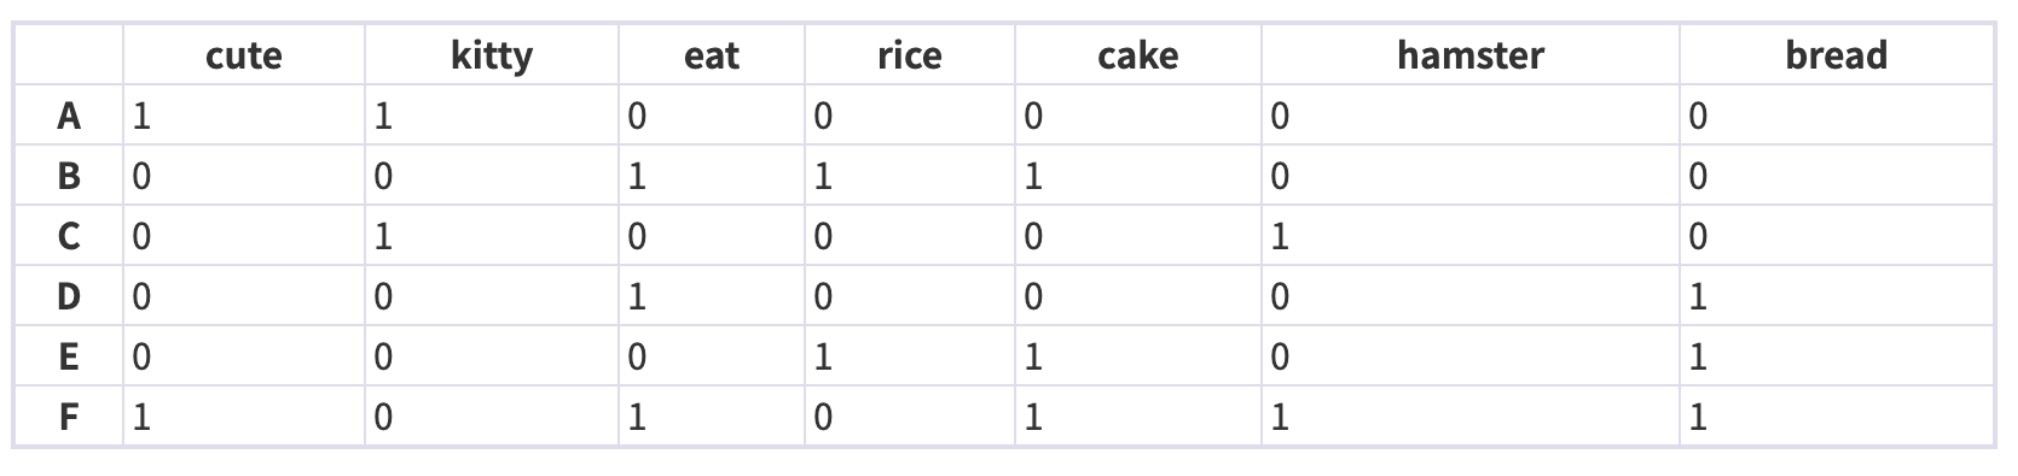

In [301]:
# DTM
voca = ['cute','kitty','eat','rice','cake','hamster','bread']
docu = ['A','B','C','D','E','F']
D = np.array([[1,1,0,0,0,0,0],
            [0,0,1,1,1,0,0],
            [0,1,0,0,0,1,0],
            [0,0,1,0,0,0,1],
            [0,0,0,1,1,0,1],
            [1,0,1,0,1,1,1]])

In [302]:
U,sigma,Vt = np.linalg.svd(D.T,full_matrices=False)

In [303]:
U.shape, sigma.shape, Vt.shape

((7, 6), (6,), (6, 6))

In [304]:
_sigma = np.diag(sigma)
_sigma.shape

(6, 6)

In [306]:
_D = np.round(U.dot(_sigma.dot(Vt)))
pd.DataFrame(_D,index=voca,columns=docu)

,A,B,C,D,E,F
cute,1.0,-0.0,-0.0,-0.0,-0.0,1.0
kitty,1.0,-0.0,1.0,0.0,-0.0,0.0
eat,0.0,1.0,-0.0,1.0,0.0,1.0
rice,-0.0,1.0,-0.0,0.0,1.0,0.0
cake,-0.0,1.0,-0.0,0.0,1.0,1.0
hamster,0.0,0.0,1.0,0.0,0.0,1.0
bread,0.0,0.0,-0.0,1.0,1.0,1.0


In [307]:
U.shape

(7, 6)

In [308]:
pd.DataFrame(U.dot(_sigma),index=voca,columns=docu)

,A,B,C,D,E,F
cute,-0.805857,0.869863,-0.049325,-7.457939e-16,-7.071068e-01,-0.302490
kitty,-0.234822,1.138337,0.640451,7.457939e-16,4.773959e-15,0.488744
eat,-1.459347,-0.131908,-0.519923,-7.071068e-01,3.330669e-15,0.287377
rice,-0.883220,-0.715663,0.825868,-1.110223e-16,1.276756e-15,0.160283
cake,-1.571666,-0.414968,0.456318,-5.728015e-16,-3.941292e-15,-0.386578
hamster,-0.805857,0.869863,-0.049325,-2.574246e-16,7.071068e-01,-0.302490
bread,-1.459347,-0.131908,-0.519923,7.071068e-01,2.997602e-15,0.287377


In [309]:
_sigma = np.diag(sigma[:2])
_sigma

array([[2.9771718 , 0.        ],
       [0.        , 1.87837842]])

In [310]:
U[:,:2].dot(_sigma)

array([[-0.8058567 ,  0.8698632 ],
       [-0.23482206,  1.13833682],
       [-1.45934746, -0.1319077 ],
       [-0.88321998, -0.71566271],
       [-1.57166566, -0.41496792],
       [-0.8058567 ,  0.8698632 ],
       [-1.45934746, -0.1319077 ]])

In [311]:
# K = 2
pd.DataFrame(U[:,:2].dot(_sigma.dot(Vt[:2,:])), index=voca,columns=docu)

,A,B,C,D,E,F
cute,0.589715,0.044610,0.589715,0.200321,0.044610,0.816352
kitty,0.675476,-0.303633,0.675476,-0.007790,-0.303633,0.503954
eat,0.096266,0.691663,0.096266,0.490414,0.691663,0.965017
rice,-0.303633,0.646125,-0.303633,0.344348,0.646125,0.392853
cake,-0.051656,0.842552,-0.051656,0.548564,0.842552,0.957228
hamster,0.589715,0.044610,0.589715,0.200321,0.044610,0.816352
bread,0.096266,0.691663,0.096266,0.490414,0.691663,0.965017


In [313]:
# 원래 
pd.DataFrame(U.dot(np.diag(sigma)).dot(Vt),index=voca,columns=docu)

,A,B,C,D,E,F
cute,1.000000e+00,-1.675601e-16,-6.677030e-16,-1.387636e-15,-2.191352e-16,1.000000e+00
kitty,1.000000e+00,-2.557817e-16,1.000000e+00,1.630330e-16,8.011864e-18,-2.544172e-17
eat,2.041953e-16,1.000000e+00,-2.440161e-16,1.000000e+00,5.670057e-16,1.000000e+00
rice,-3.597266e-16,1.000000e+00,-3.926756e-16,5.158151e-16,1.000000e+00,1.918621e-16
cake,-1.770751e-16,1.000000e+00,-9.008718e-17,4.956498e-16,1.000000e+00,1.000000e+00
hamster,4.614016e-16,5.073249e-16,1.000000e+00,1.579954e-15,2.822774e-16,1.000000e+00
bread,1.580568e-16,5.896033e-17,-3.734214e-16,1.000000e+00,1.000000e+00,1.000000e+00


# 1. 단어 ~ 단어 Cosine similarity

In [314]:
_U = U.dot(np.diag(sigma))
_U.shape

(7, 6)

In [315]:
# 단어간의 
# Cosine similarity
pd.DataFrame(_U.dot(_U.T) / (np.linalg.norm(_U, axis=1).reshape(7,1) * np.linalg.norm(_U.T, axis=0).reshape(1,7)),index=voca,columns=voca)

,cute,kitty,eat,rice,cake,hamster,bread
cute,1.000000e+00,5.000000e-01,4.082483e-01,-2.117012e-16,4.082483e-01,5.000000e-01,4.082483e-01
kitty,5.000000e-01,1.000000e+00,1.716863e-16,-1.688315e-16,9.512810e-17,5.000000e-01,3.719689e-16
eat,4.082483e-01,1.716863e-16,1.000000e+00,4.082483e-01,6.666667e-01,4.082483e-01,6.666667e-01
rice,-2.117012e-16,-1.688315e-16,4.082483e-01,1.000000e+00,8.164966e-01,5.325727e-16,4.082483e-01
cake,4.082483e-01,9.512810e-17,6.666667e-01,8.164966e-01,1.000000e+00,4.082483e-01,6.666667e-01
hamster,5.000000e-01,5.000000e-01,4.082483e-01,5.325727e-16,4.082483e-01,1.000000e+00,4.082483e-01
bread,4.082483e-01,3.719689e-16,6.666667e-01,4.082483e-01,6.666667e-01,4.082483e-01,1.000000e+00


## 1-1. K 바꾸기

In [316]:
# K = 2
# 단어 관계 찾기
_U = U[:,:2].dot(_sigma)

In [317]:
_U.shape

(7, 2)

In [318]:
pd.DataFrame(_U.dot(_U.T) / (np.linalg.norm(_U, axis=1).reshape(7,1) * np.linalg.norm(_U.T, axis=0).reshape(1,7)),index=voca,columns=voca)

,cute,kitty,eat,rice,cake,hamster,bread
cute,1.000000,0.855755,0.610805,0.066189,0.469814,1.000000,0.610805
kitty,0.855755,1.000000,0.113046,-0.459606,-0.054681,0.855755,0.113046
eat,0.610805,0.113046,1.000000,0.830473,0.985922,0.610805,1.000000
rice,0.066189,-0.459606,0.830473,1.000000,0.911926,0.066189,0.830473
cake,0.469814,-0.054681,0.985922,0.911926,1.000000,0.469814,0.985922
hamster,1.000000,0.855755,0.610805,0.066189,0.469814,1.000000,0.610805
bread,0.610805,0.113046,1.000000,0.830473,0.985922,0.610805,1.000000


# 2. 문서 ~ 문서 Cosine similarity

In [264]:
_U = np.diag(sigma).dot(Vt)

In [265]:
# 열이 문서차원 
_U.shape

(6, 6)

In [300]:
# 문서에 대해서 
pd.DataFrame(_U.T.dot(_U) / (np.linalg.norm(_U.T, axis=1).reshape(6,1) * np.linalg.norm(_U, axis=0).reshape(1,6)),index=docu,columns=docu)

,A,B,C,D,E,F
A,1.000000,-0.155954,1.000000,0.172833,-0.155954,0.552114
B,-0.155954,1.000000,-0.155954,0.945945,1.000000,0.737462
C,1.000000,-0.155954,1.000000,0.172833,-0.155954,0.552114
D,0.172833,0.945945,0.172833,1.000000,0.945945,0.916645
E,-0.155954,1.000000,-0.155954,0.945945,1.000000,0.737462
F,0.552114,0.737462,0.552114,0.916645,0.737462,1.000000


## 2-2. K 바꾸기

In [298]:
# K = 2 바꾸기
_U = _sigma.dot(Vt[:2,:])
_U.shape

(2, 6)

In [299]:
# 1,3 / 3,5문서가 가까움 
# 차원을 줄이면서 정보를 버리게 되면서 관계를 찾아내게 됨.
pd.DataFrame(_U.T.dot(_U) / (np.linalg.norm(_U.T, axis=1).reshape(6,1) * np.linalg.norm(_U, axis=0).reshape(1,6)),index=docu,columns=docu)

,A,B,C,D,E,F
A,1.000000,-0.155954,1.000000,0.172833,-0.155954,0.552114
B,-0.155954,1.000000,-0.155954,0.945945,1.000000,0.737462
C,1.000000,-0.155954,1.000000,0.172833,-0.155954,0.552114
D,0.172833,0.945945,0.172833,1.000000,0.945945,0.916645
E,-0.155954,1.000000,-0.155954,0.945945,1.000000,0.737462
F,0.552114,0.737462,0.552114,0.916645,0.737462,1.000000


# 문서내의 단어간의 유사도

In [285]:
# K = 2
_sigma = np.diag(sigma[:2])
_U = U[:,:2].dot(_sigma)

In [286]:
cluster = pd.DataFrame(_U,index=voca)
cluster

,0,1
cute,-0.805857,0.869863
kitty,-0.234822,1.138337
eat,-1.459347,-0.131908
rice,-0.883220,-0.715663
cake,-1.571666,-0.414968
hamster,-0.805857,0.869863
bread,-1.459347,-0.131908


통상적으로는 첫 번째 컬럼이 변별력이 없기 때문에 버린다

In [287]:
temp = cluster.sort_values(by=[1],ascending=False)
temp[temp[1] > 0 ][1].to_dict()

{'kitty': 1.1383368215998813,
 'hamster': 0.8698632014931696,
 'cute': 0.8698632014931686}

In [319]:
# 다 -라 값이 나오지 않음 
temp = cluster.sort_values(by=[1],ascending=False)
temp[temp[1] < 0][1].to_dict()

{'eat': -0.13190770045543182,
 'bread': -0.13190770045543182,
 'cake': -0.41496792414637645,
 'rice': -0.7156627148396051}

클러스터의 갯수가 더 많으면 음수로 분류할 수는 없다!